### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [51]:
from PIL import Image
import numpy as np

# reading an image and convert to array
myimage = np.array(Image.open('img/moon.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('image.jpg')

Array can be displayed as an image using Matplotlib module. Here a short example:

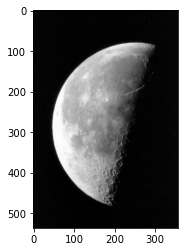

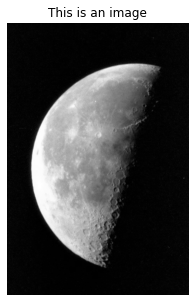

In [52]:
import matplotlib.pyplot as plt
plt.gray() # optional call to display image using a gray colormap


# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py). 

Writing and testing a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [53]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    return np.array(Image.open(fname))

In [54]:
img = openImage("./img/moon.png")
img

array([[ 1,  3,  7, ...,  8, 16,  8],
       [ 3,  7,  3, ...,  4, 11, 12],
       [ 6,  4,  6, ...,  7,  2,  3],
       ...,
       [ 4,  8,  8, ...,  6,  4,  8],
       [ 4,  8,  8, ...,  4,  6,  6],
       [ 2,  3,  3, ...,  6,  9,  9]], dtype=uint8)

Writing and testing a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [55]:
def countPixels(I,k):
    
    """ Array*int -> int"""
    
    res = np.where(I==k, 1, 0).sum()

    return res


def countPixels_loop(I,k):
    """ Array*int -> int"""

    nbcount = 0
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if(I[i,j] == k):
                nbcount += 1

    return nbcount

In [56]:
print(countPixels(img, 40))
print(countPixels_loop(img, 40))

101
101


Writing and testing a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [57]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    
    new_I = I.copy()
    new_I[new_I == k1] = k2
    
    return new_I

def replacePixels_loop(I,k1,k2):
    """ Array*int*int -> Array """

    
    new_I = I.copy()
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if(new_I[i,j] == k1):
                new_I[i,j] = k2
                
    return new_I

In [58]:
img_replaced = replacePixels(img, 23, 40)
print(countPixels(img_replaced, 40))

img_replaced_bis = replacePixels(img, 23, 40)
print(countPixels(img_replaced_bis, 40))

241
241


Writing and testing a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [59]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    
    min_I = np.min(I)
    max_I = np.max(I)
    
    res = ((I - min_I) / (max_I - min_I)) * (k2 - k1) + k1 

    return res



def normalizeImage_loop(I,k1,k2):
    """ Array*int*int -> Array """

    
    min_I = np.min(I)
    max_I = np.max(I)
    
    res_I = []
    
    for i in range(I.shape[0]):
        tmp = []
        for j in range(I.shape[1]):
            tmp.append((I[i,j] - min_I) / (max_I - min_I) * (k2 - k1) + k1)
        res_I.append(tmp)

    
    return np.array(res_I)

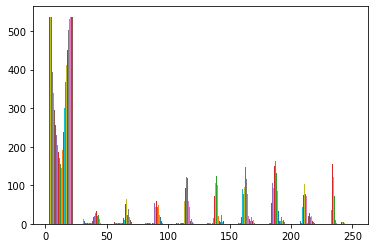

In [60]:
plt.hist(img)
plt.show()

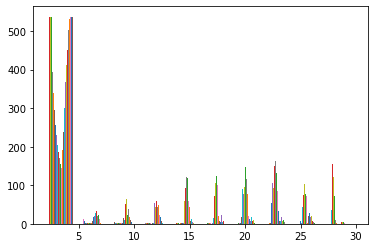

In [61]:
img_normalized = normalizeImage(img, 2, 30)
plt.hist(img_normalized)
plt.show()

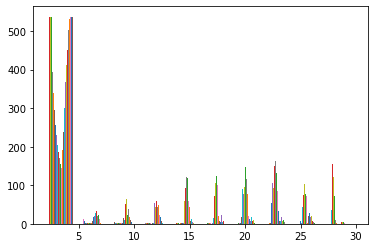

In [62]:
img_normalized = normalizeImage_loop(img, 2, 30)
plt.hist(img_normalized)
plt.show()

Writing and testing a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

In [63]:
def inverteImage(I):
    """ Array -> Array """
    
    res = 255 - I
    
    return res

def inverteImage_loop(I):
    """ Array -> Array """

    new_I = I.copy()
    
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            new_I[i,j] = 255 - I[i,j] 
            
    return new_I

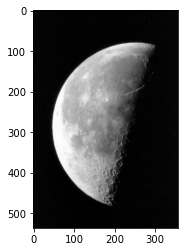

In [64]:
plt.imshow(img)

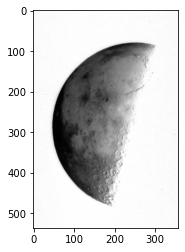

In [65]:
img_inverted = inverteImage_loop(img)
plt.imshow(img_inverted)

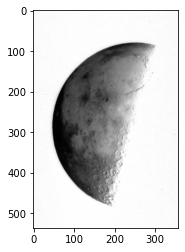

In [66]:
img_inverted = inverteImage(img)
plt.imshow(img_inverted)

Writing and testing a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [67]:
def computeHistogram(I):
    """ Array -> list[int] """
    
    res = np.unique(I, return_counts=True)
    
    return res

def computeHistogram_loop(I):
    """ Array -> list[int] """
    histo = [0 for i in range(254)]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            histo[I[i,j]] += 1 
        
    return np.array(histo)

In [68]:
computeHistogram(img)[1]

array([ 1459, 20126, 30924, 25408, 17167, 11368,  7369,  4767,  3213,
        2178,  1486,   993,   632,   488,   371,   301,   255,   217,
         201,   202,   190,   165,   168,   140,   160,   157,   129,
         136,   140,   135,   137,   121,   137,   114,   127,   129,
         115,   132,   123,   124,   101,    91,   122,   116,   129,
         109,   108,   116,   113,   123,   109,   140,   101,   109,
         114,   117,   140,   127,   140,   142,   129,   134,   192,
         160,   179,   165,   170,   154,   155,   159,   164,   184,
         166,   180,   169,   132,   153,   171,   165,   156,   166,
         142,   151,   179,   159,   154,   167,   166,   179,   163,
         195,   198,   181,   216,   230,   231,   250,   256,   264,
         291,   245,   242,   279,   247,   261,   304,   287,   286,
         296,   286,   292,   296,   285,   312,   274,   312,   282,
         308,   296,   267,   273,   304,   327,   263,   286,   282,
         272,   246,

In [69]:
 computeHistogram_loop(img)

array([ 1459, 20126, 30924, 25408, 17167, 11368,  7369,  4767,  3213,
        2178,  1486,   993,   632,   488,   371,   301,   255,   217,
         201,   202,   190,   165,   168,   140,   160,   157,   129,
         136,   140,   135,   137,   121,   137,   114,   127,   129,
         115,   132,   123,   124,   101,    91,   122,   116,   129,
         109,   108,   116,   113,   123,   109,   140,   101,   109,
         114,   117,   140,   127,   140,   142,   129,   134,   192,
         160,   179,   165,   170,   154,   155,   159,   164,   184,
         166,   180,   169,   132,   153,   171,   165,   156,   166,
         142,   151,   179,   159,   154,   167,   166,   179,   163,
         195,   198,   181,   216,   230,   231,   250,   256,   264,
         291,   245,   242,   279,   247,   261,   304,   287,   286,
         296,   286,   292,   296,   285,   312,   274,   312,   282,
         308,   296,   267,   273,   304,   327,   263,   286,   282,
         272,   246,

Writing and testing a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

In [70]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    
    res = np.where(I < s, 0, 255)
    
    return res


def thresholdImage_loop(I,s):
    """ Array*int -> Array """
    
    new_I = I.copy()
    
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if(I[i,j] < s):
                new_I[i,j] = 0
            else:
                new_I[i,j] = 255
    
    return new_I

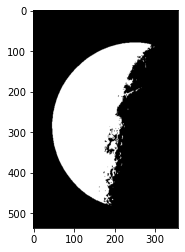

In [71]:
img_thresholded = thresholdImage(img, 96)
plt.imshow(img_thresholded)

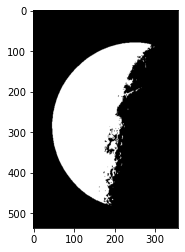

In [72]:
img_thresholded = thresholdImage_loop(img, 96)
plt.imshow(img_thresholded)

Using previous functions, giving a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

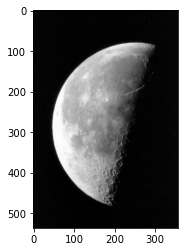

In [73]:

img = openImage("./img/moon.png")
plt.imshow(img)

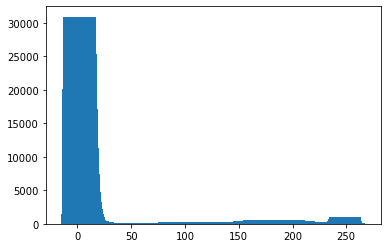

In [74]:
pixels, values = computeHistogram(img)

plt.bar(pixels, values, 30)
plt.show()

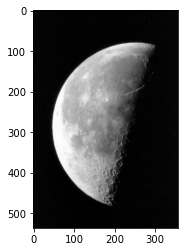

In [75]:
plt.imshow(img)

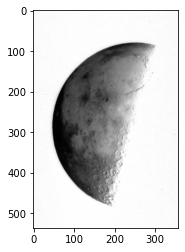

In [76]:
img_inverted = inverteImage(img)
plt.imshow(img_inverted)

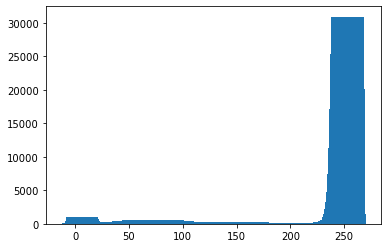

In [77]:
pixels, values = computeHistogram(img_inverted)

plt.bar(pixels, values, 30)
plt.show()

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

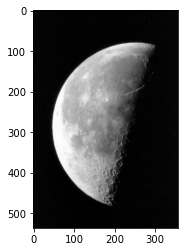

In [78]:
img = openImage("./img/moon.png")
plt.imshow(img)

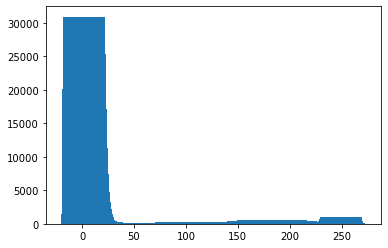

In [79]:
pixels, values = computeHistogram(img)

plt.bar(pixels, values, 40)
plt.show()

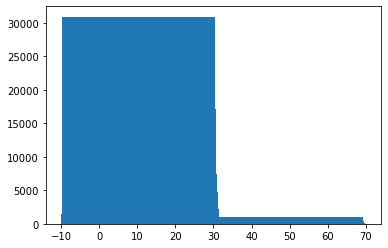

In [80]:
img_normalized = normalizeImage(img, 10, 50)

pixels, values = computeHistogram(img_normalized)

plt.bar(pixels, values, 40)
plt.show()

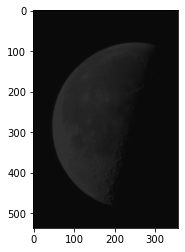

In [81]:
plt.imshow(img_normalized, vmin=0, vmax=255)

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

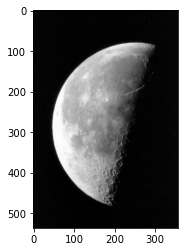

In [82]:
img = openImage("./img/moon.png")
plt.imshow(img)

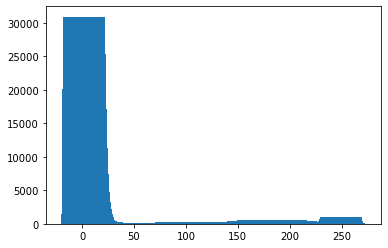

In [83]:
pixels, values = computeHistogram(img)

plt.bar(pixels, values, 40)
plt.show()

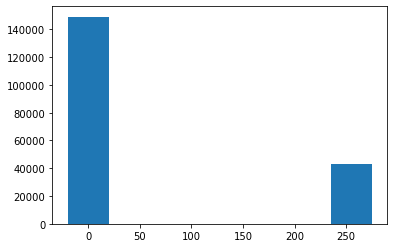

In [84]:
img_thresholded = thresholdImage(img, 127)

pixels, values = computeHistogram(img_thresholded)

plt.bar(pixels, values, 40)
plt.show()

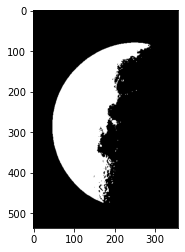

In [85]:
plt.imshow(img_thresholded, vmin=0, vmax=255)

## Generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 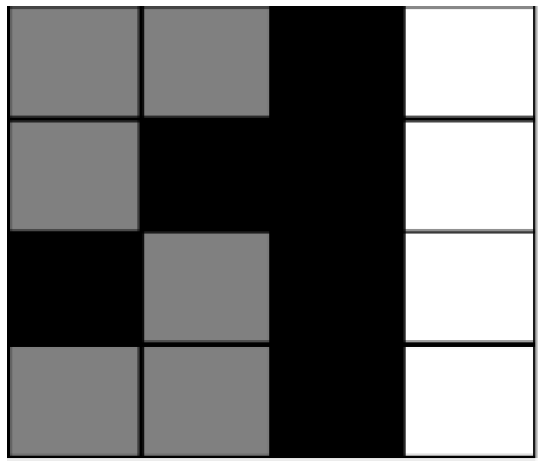 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

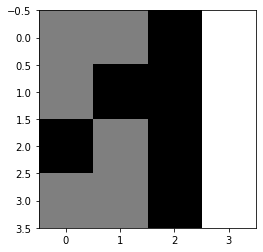

In [86]:
I = np.array([[127, 127, 0, 255],
     [127,   0, 0, 255],
     [  0, 127, 0, 255],
     [127, 127, 0, 255]
    ])

plt.imshow(I)

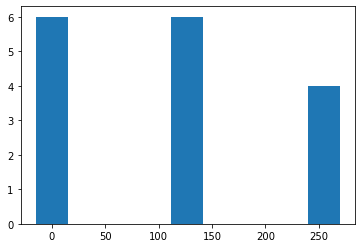

In [87]:
pixels, values = computeHistogram(I)

plt.bar(pixels, values, 30)
plt.show()

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

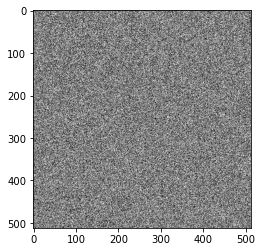

In [88]:
import numpy.matlib

Iu = np.array(np.matlib.rand(512, 512) * 255, dtype=int)
plt.imshow(Iu)

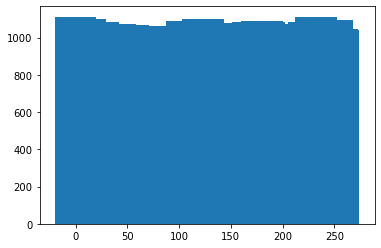

In [89]:
pixels, values = computeHistogram(Iu)

plt.bar(pixels, values, 40)
plt.show()

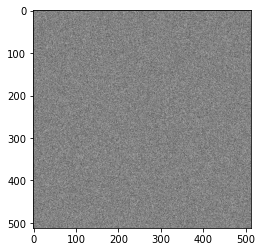

In [90]:
Ig = np.array(16 * np.matlib.randn(512, 512) + 128, dtype=int)
plt.imshow(Ig)

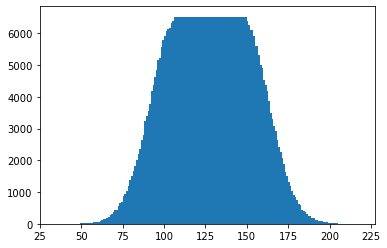

In [91]:
pixels, values = computeHistogram(Ig)

plt.bar(pixels, values, 40)
plt.show()

## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.png`. 

Reading and displaying this image

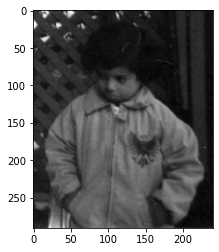

In [92]:
img = openImage("./img/pout.png")
plt.imshow(img)

Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

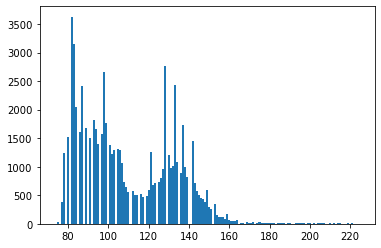

In [93]:
pixels, values = computeHistogram(img)

plt.bar(pixels, values, 1)
plt.show()

In [94]:
np.min(img)

74

In [95]:
np.max(img)

224

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

In [96]:
def histogramCumulative(h):
    res = [0 for i in range(len(h))]
    for i in range(len(h)):
        if(i == 0):
            res[i] = h[i]
        else:
            res[i] = res[i-1]+h[i]
    return res


def histogramEqualization(I,h):
    
    """ Array * (list[int] -> Array """    
    
    h_cum = histogramCumulative(h)
    N, M = I.shape
    L = I.max() - I.min() 
    res = []
    
    for k in range(len(h)):
        res.append(int((L-1)/(N*M) * h_cum[k]))
        
    return np.array(res)

<BarContainer object of 149 artists>

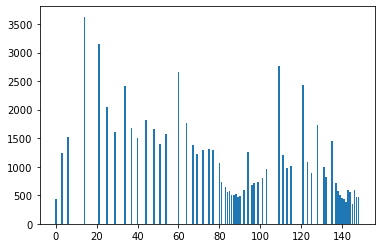

In [99]:
histo_eq = histogramEqualization(img,values)
effects = np.zeros((np.max(histo_eq) + 1))

for i in range(len(histo_eq)):
    effects[histo_eq[i]] += values[i]
    
plt.bar(np.arange(np.max(histo_eq) + 1), effects)

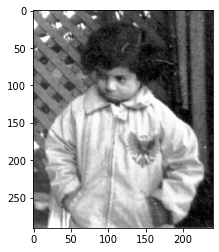

In [100]:
new_img = np.zeros(img.shape)
l, c = img.shape

l_pix = list(pixels)

for i in range(l):
    for j in range(c):
        new_img[i][j] = histo_eq[l_pix.index(img[i][j])]
        
plt.imshow(new_img)